In [16]:
import json
import matplotlib.pyplot as plt
from collections import Counter
import statistics
from datetime import datetime
from collections import defaultdict

In [2]:
business = []
with open("yelp_training_set_business.json", "r") as file:
    for line in file:
        business.append(json.loads(line))

checkin = []
with open("yelp_training_set_checkin.json", "r") as file:
    for line in file:
        checkin.append(json.loads(line))

review = []
with open("yelp_training_set_review.json", "r") as file:
    for line in file:
        review.append(json.loads(line))

user = []
with open("yelp_training_set_user.json", "r") as file:
    for line in file:
        user.append(json.loads(line))
        

In [3]:
print(f"business dataset size: {len(business)}")
print("business dataset sample:")
print(json.dumps(business[0], indent=4))

business dataset size: 11537
business dataset sample:
{
    "business_id": "rncjoVoEFUJGCUoC1JgnUA",
    "full_address": "8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",
    "open": true,
    "categories": [
        "Accountants",
        "Professional Services",
        "Tax Services",
        "Financial Services"
    ],
    "city": "Peoria",
    "review_count": 3,
    "name": "Peoria Income Tax Service",
    "neighborhoods": [],
    "longitude": -112.241596,
    "state": "AZ",
    "stars": 5.0,
    "latitude": 33.581867,
    "type": "business"
}


In [4]:
print(f"checkin dataset size: {len(checkin)}")
print("checkin dataset sample:")
print(json.dumps(checkin[0], indent=4))

checkin dataset size: 8282
checkin dataset sample:
{
    "checkin_info": {
        "11-3": 17,
        "8-5": 1,
        "15-0": 2,
        "15-3": 2,
        "15-5": 2,
        "14-4": 1,
        "14-5": 3,
        "14-6": 6,
        "14-0": 2,
        "14-1": 2,
        "14-3": 2,
        "0-5": 1,
        "1-6": 1,
        "11-5": 3,
        "11-4": 11,
        "13-1": 1,
        "11-6": 6,
        "11-1": 18,
        "13-6": 5,
        "13-5": 4,
        "11-2": 9,
        "12-6": 5,
        "12-4": 8,
        "12-5": 5,
        "12-2": 12,
        "12-3": 19,
        "12-0": 20,
        "12-1": 14,
        "13-3": 1,
        "9-5": 2,
        "9-4": 1,
        "13-2": 6,
        "20-1": 1,
        "9-6": 4,
        "16-3": 1,
        "16-1": 1,
        "16-5": 1,
        "10-0": 3,
        "10-1": 4,
        "10-2": 4,
        "10-3": 4,
        "10-4": 1,
        "10-5": 2,
        "10-6": 2,
        "11-0": 3
    },
    "type": "checkin",
    "business_id": "KO9CpaSPOoqm0iCWm5sc

In [5]:
print(f"review dataset size: {len(review)}")
print("review dataset sample:")
print(json.dumps(review[0], indent=4))

review dataset size: 229907
review dataset sample:
{
    "votes": {
        "funny": 0,
        "useful": 5,
        "cool": 2
    },
    "user_id": "rLtl8ZkDX5vH5nAx9C3q5Q",
    "review_id": "fWKvX83p0-ka4JS3dc6E5A",
    "stars": 5,
    "date": "2011-01-26",
    "text": "My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with

In [6]:
print(f"user dataset size: {len(user)}")
print("user dataset sample:")
print(json.dumps(user[0], indent=4))

user dataset size: 43873
user dataset sample:
{
    "votes": {
        "funny": 0,
        "useful": 7,
        "cool": 0
    },
    "user_id": "CR2y7yEm4X035ZMzrTtN9Q",
    "name": "Jim",
    "average_stars": 5.0,
    "review_count": 6,
    "type": "user"
}


In [7]:
### exploratory analysis

In [8]:
## review stars

# basic info
stars = [d["stars"] for d in review]
count = len(stars)
print(f"Total count: {count}")
average = sum(stars) / count
print(f"Average: {average}")
std_dev = statistics.stdev(stars)
print(f"Standard Deviation: {std_dev}")
min_stars = min(stars)
max_stars = max(stars)
print(f"Min: {min_stars}")
print(f"Max: {max_stars}")


Total count: 229907
Average: 3.766723066283323
Standard Deviation: 1.2170100856365875
Min: 1
Max: 5


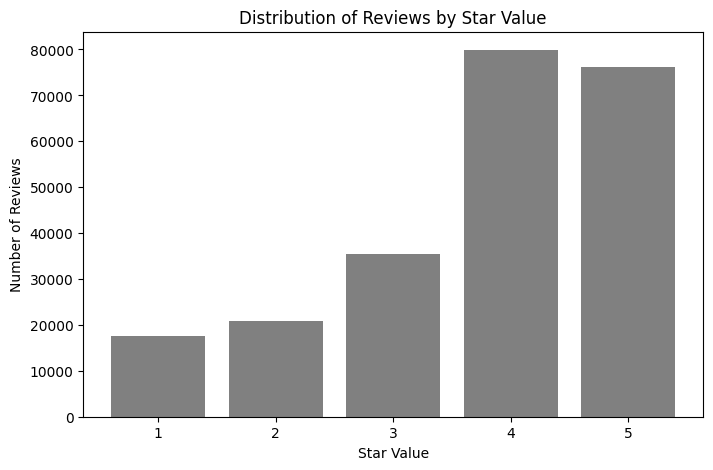

In [9]:
# star counts
star_counts = Counter(stars)
plt.figure(figsize=(8, 5))
plt.bar(star_counts.keys(), star_counts.values(), color='grey')
plt.xlabel('Star Value')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Star Value')
plt.xticks(range(1, 6))
plt.show()

In [12]:
# review starts & date
dates = []
for r in review:
    dates.append(datetime.strptime(r["date"], "%Y-%m-%d"))

In [14]:
min_date = min(dates)
max_date = max(dates)
print(f"Date Range: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")

Date Range: 2005-03-07 to 2013-01-05


In [20]:
ratings_by_year = defaultdict(list)
for i in range(len(stars)):
    year = dates[i].year
    ratings_by_year[year].append(stars[i])

for year in sorted(ratings_by_year.keys()):
    ratings = ratings_by_year[year]
    avg_rating = sum(ratings) / len(ratings)
    print(f"Year {year}: Average Rating = {avg_rating}")

Year 2005: Average Rating = 4.138613861386139
Year 2006: Average Rating = 3.770559210526316
Year 2007: Average Rating = 3.831209713686104
Year 2008: Average Rating = 3.7355260061190867
Year 2009: Average Rating = 3.7203615497130857
Year 2010: Average Rating = 3.7721923375067536
Year 2011: Average Rating = 3.7812720349739104
Year 2012: Average Rating = 3.7690188448812076
Year 2013: Average Rating = 3.7467309015829318


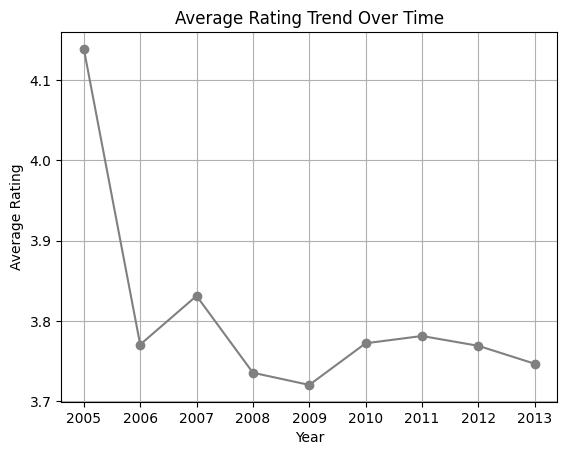

In [ ]:
years = sorted(ratings_by_year.keys())
avg_ratings_year = [sum(ratings_by_year[year]) / len(ratings_by_year[year]) for year in years]

plt.plot(years, avg_ratings_year, marker='o', linestyle='-', color='grey')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Trend Over Time (Year)')
plt.grid(True)
plt.show()

In [27]:
ratings_by_year_month = defaultdict(list)
for i in range(len(stars)):
    year_month = (dates[i].year, dates[i].month)
    ratings_by_year_month[year_month].append(stars[i])

for year_month in sorted(ratings_by_year_month.keys()):
    ratings = ratings_by_year_month[year_month]
    avg_rating = sum(ratings) / len(ratings)
    print(f"{year_month[0]}-{year_month[1]:02d}: Average Rating = {avg_rating}")

2005-03: Average Rating = 4.5
2005-04: Average Rating = 4.636363636363637
2005-05: Average Rating = 4.0
2005-06: Average Rating = 5.0
2005-07: Average Rating = 4.318181818181818
2005-08: Average Rating = 4.0
2005-09: Average Rating = 4.0
2005-10: Average Rating = 3.769230769230769
2005-11: Average Rating = 4.130434782608695
2005-12: Average Rating = 3.85
2006-01: Average Rating = 3.7829457364341086
2006-02: Average Rating = 3.857142857142857
2006-03: Average Rating = 3.925
2006-04: Average Rating = 3.9565217391304346
2006-05: Average Rating = 3.75
2006-06: Average Rating = 3.9454545454545453
2006-07: Average Rating = 3.8
2006-08: Average Rating = 3.770700636942675
2006-09: Average Rating = 3.6732673267326734
2006-10: Average Rating = 3.652439024390244
2006-11: Average Rating = 3.810810810810811
2006-12: Average Rating = 3.76
2007-01: Average Rating = 3.9371584699453552
2007-02: Average Rating = 3.9439071566731143
2007-03: Average Rating = 3.8609271523178808
2007-04: Average Rating = 3.

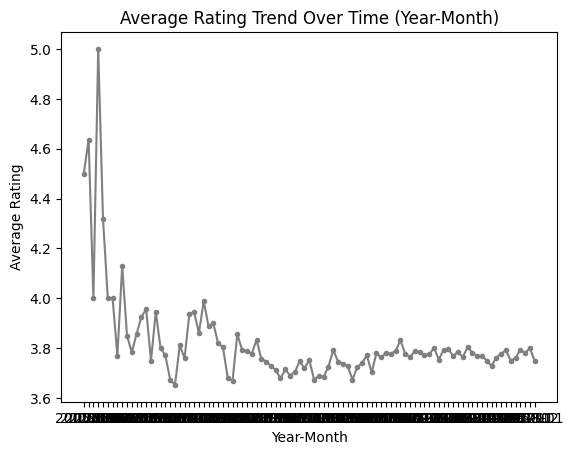

In [33]:
year_months = sorted(ratings_by_year_month.keys())
avg_ratings_year_month = [sum(ratings_by_year_month[year_month]) / len(ratings_by_year_month[year_month]) for year_month in year_months]
year_month_labels = [f"{year_month[0]}-{year_month[1]:02d}" for year_month in year_months]
plt.plot(year_month_labels, avg_ratings_year_month, marker='o', markersize=3, linestyle='-', color='grey')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.title('Average Rating Trend Over Time (Year-Month)')
# plt.xticks(rotation=90)
plt.show()